![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

<center>Taller desarrollado por: David Zapata Vásquez - d.zapata11@uniandes.edu.co</center>

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [10]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [8]:
# Calculando estadísticas descriptivas para 'season'
season_description = bikes.groupby('season')['total'].describe()

# Calculando estadísticas descriptivas para 'hour'
hour_description = bikes.groupby('hour')['total'].describe()

# Imprimir las estadísticas para 'season'
print(season_description)

# Imprimir las estadísticas para 'hour'
print(hour_description)

         count        mean         std  min   25%    50%    75%    max
season                                                                
1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0
      count        mean         std   min     25%    50%     75%    max
hour                                                                   
0     455.0   55.138462   43.620012   2.0   24.00   41.0   74.50  283.0
1     454.0   33.859031   34.112105   1.0   11.00   19.0   46.00  168.0
2     448.0   22.899554   26.110267   1.0    5.00   11.0   32.00  119.0
3     433.0   11.757506   12.666442   1.0    3.00    6.0   15.00   66.0
4     442.0    6.407240    4.217633   1.0    3.00    6.0    9.00   28.0
5     452.0   19.767699   12.784293   1.0    8.00   19.0   29.00   57.

* **Análisis de la variable "season":**
    La variable *season* tiene 4 categorías que representan las temporadas del año. Basándonos en la media de alquileres de bicicletas por temporada, se observa que la temporada 3 (**verano**) tiene la mayor cantidad de alquileres de bicicletas, seguida por la temporada 2 (**primavera**). Esto podría sugerir que las condiciones climáticas más cálidas fomentan el uso de bicicletas. Las temporadas 1 (**invierno**) y 4 (**otoño**) tienen menos alquileres, lo que podría indicar que el clima más frío o las condiciones de lluvia típicas del otoño e invierno disminuyen la tendencia a alquilar bicicletas.

    Además de las medias, podríamos considerar la **desviación estándar** para entender la variabilidad de los alquileres en cada temporada. Observamos que la temporada 3 (**verano**) no solo tiene la media más alta sino también una desviación estándar considerable, lo que sugiere que, aunque es la temporada **más popular** para el alquiler de bicicletas, el número de alquileres puede variar significativamente de un día a otro. En contraste, la temporada 1 (**invierno**) tiene la media **más baja** pero también una menor desviación estándar, lo que indica que hay una consistencia en el uso reducido de bicicletas.

    Los valores mínimo y máximo nos proporcionan información sobre los **días atípicos**, como eventos especiales o condiciones climáticas extremas que podrían influir en el número de alquileres. Los percentiles 25 y 75 nos dan una idea de la distribución de los datos, indicando que la mayoría de los alquileres en todas las temporadas ocurren dentro de estos rangos.

* **Análisis de la variable "hour":**
    Al analizar la variable *hour*, se ve que las horas con mayor promedio de alquileres de bicicletas son las 8, 17 y 18 horas, lo que se alinea con las horas pico de desplazamiento al trabajo y regreso a casa. Las horas nocturnas y las primeras horas de la mañana tienen los menores promedios, lo que refleja una menor demanda durante estos tiempos.

    Al analizar las estadísticas descriptivas por hora, se puede notar que, además de las horas pico, hay un **aumento notable** en el alquiler de bicicletas durante el **mediodía** (hora 12), posiblemente debido a personas que salen a almorzar o realizan actividades durante el descanso del mediodía.

    La variabilidad, medida por la desviación estándar, es alta durante las horas pico, lo cual es esperable debido a la fluctuación de la demanda en estos horarios. Las horas de baja demanda, como las primeras de la mañana (4-5 am), no solo tienen bajos promedios de alquiler sino también bajas desviaciones estándar, lo que indica que hay poca variabilidad y consistentemente baja demanda.

    Los valores máximos durante las horas pico sugieren que pueden haber días específicos con demandas extraordinariamente altas, tal vez relacionadas con eventos especiales o cambios en las condiciones climáticas. Los valores mínimos cercanos a cero en todas las horas indican que hay momentos en que casi no se alquilan bicicletas, probablemente en horas tardías de la noche o muy temprano en la mañana cuando la mayoría de las personas no están viajando.

**Conclusión general**

Este análisis descriptivo sugiere patrones claros de uso de bicicletas que están influenciados tanto por **la estacionalidad** como por **el horario diario**. La información puede ser utilizada para ajustar los servicios de alquiler, aumentar la disponibilidad de bicicletas durante los periodos de alta demanda y reducir el exceso de bicicletas durante los periodos de baja actividad. Además, podría proporcionar datos valiosos para la planificación urbana, promoción de actividades saludables y establecimiento de políticas de transporte sostenible.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

In [10]:
import matplotlib.pyplot as plt

<Axes: xlabel='hour'>

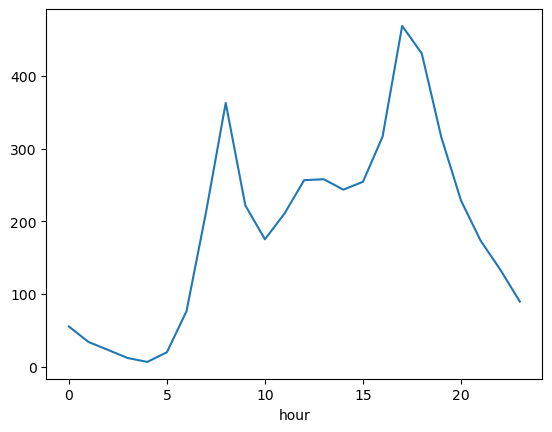

In [9]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

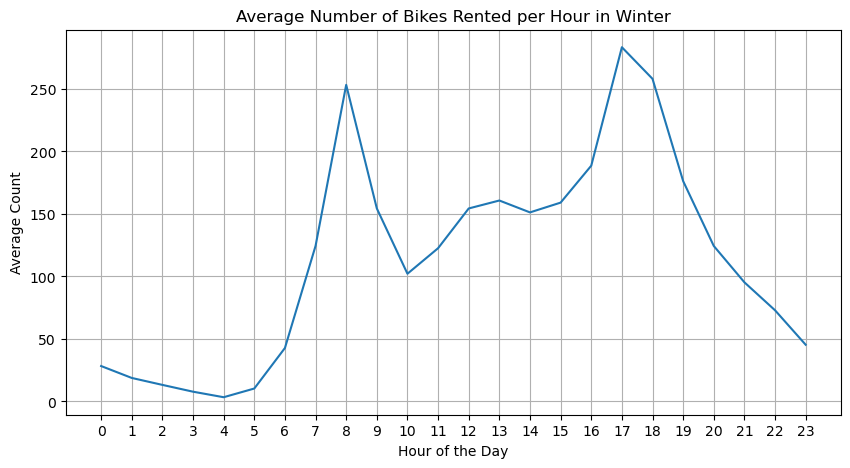

In [12]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 

# Filtrar los datos para la temporada de invierno (season == 1)
winter_data = bikes[bikes['season'] == 1]

# Calcular el promedio de alquileres por hora para el invierno
winter_hourly_average = winter_data.groupby('hour')['total'].mean()

# Graficar el promedio de alquileres por hora para el invierno
plt.figure(figsize=(10, 5))
winter_hourly_average.plot()
plt.title('Average Number of Bikes Rented per Hour in Winter')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

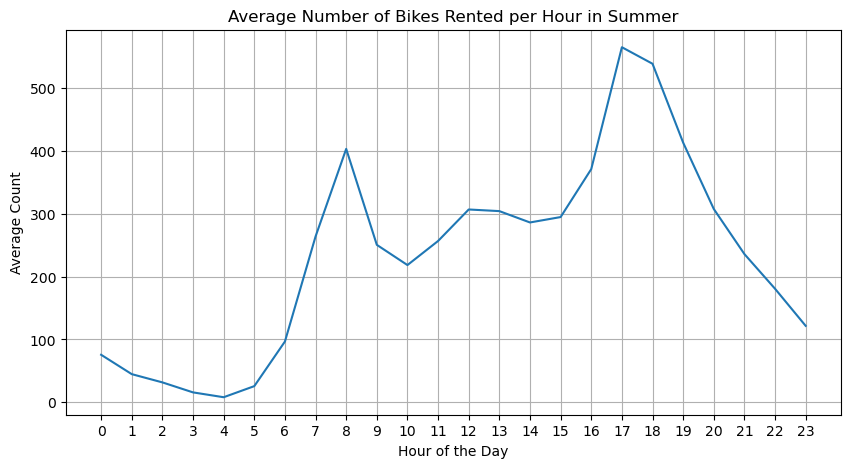

In [11]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 

# Filtrar los datos para la temporada de verano (season == 3)
summer_data = bikes[bikes['season'] == 3]

# Calcular el promedio de alquileres por hora para el verano
summer_hourly_average = summer_data.groupby('hour')['total'].mean()

# Graficar el promedio de alquileres por hora para el verano
plt.figure(figsize=(10, 5))
summer_hourly_average.plot()
plt.title('Average Number of Bikes Rented per Hour in Summer')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Análisis de Invierno:**

* La gráfica de invierno muestra dos picos prominentes en el alquiler de bicicletas, uno alrededor de las **8 de la mañana** y otro entre las **17 y las 18 horas**. Estos picos pueden estar relacionados con el tráfico de desplazamientos habituales de la **jornada laboral**, lo que sugiere que las bicicletas son utilizadas para ir al trabajo y regresar a casa.
* Fuera de las horas pico, hay una caída significativa en el uso de bicicletas, con los puntos más bajos durante las primeras horas de la mañana (entre las 0 y las 5) y una menor caída durante el mediodía.
* Aunque hay un aumento en el uso a mediodía, este no es tan pronunciado como en las horas pico, lo que podría indicar que hay menos personas que utilizan las bicicletas para actividades de ocio o tareas personales durante el horario de trabajo.

**Análisis de Verano:**

* En la gráfica de verano, los picos de alquiler son **aún más pronunciados**, especialmente en la tarde alrededor de las **17 y 18 horas**, donde se observa el pico más alto del día. Esto sugiere que el uso de bicicletas es muy popular para regresar a casa **después del trabajo en verano**.
* Durante el verano, también hay un pico notable alrededor de las 8 de la mañana, aunque no es tan alto como el de la tarde.
* A diferencia del invierno, durante el verano hay un uso más consistente y elevado de bicicletas a lo largo del día, con menor caída después de las horas pico matutinas y un aumento gradual durante la tarde. Esto podría indicar que el clima más cálido y las horas más largas de luz diurna incrementan el uso de bicicletas no solo para el desplazamiento al trabajo sino también para el ocio y otras actividades.

**Comparación entre Invierno y Verano:**

Comparando ambas estaciones, es evidente que el uso de bicicletas es **generalmente más alto en verano en casi todas las horas del día**. Esto puede estar influenciado por el clima más agradable y las condiciones más propicias para andar en bicicleta.
El patrón diario de alquileres es similar en ambas estaciones, **con picos en las horas de desplazamiento a la oficina y de regreso a casa**, aunque estos picos son más marcados en verano.

**Hallazgos Generales:**

Estos patrones refuerzan la idea de que las bicicletas son utilizadas significativamente para la conmutación diaria. Además, el clima tiene un impacto claro en el alquiler de bicicletas, con una utilización mucho mayor en el clima más cálido. Estos hallazgos podrían ser útiles para la gestión de la flota de bicicletas compartidas, sugiriendo la necesidad de disponer de más bicicletas durante las horas pico, especialmente en los meses de verano, y tal vez ofrecer incentivos o promociones para alentar el uso en las horas de menor demanda.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [6]:
# Celda 3
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Convertir "season" a variables dummy
season_dummies = pd.get_dummies(bikes['season'], prefix='season')

# Unir las variables dummy al DataFrame original
bikes = pd.concat([bikes, season_dummies], axis=1)

# Elegir 'total' como variable de respuesta y las dummies de 'season' y 'hour' como predictores
X = bikes[['hour', 'season_1', 'season_2', 'season_3']]
y = bikes['total']

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Imprimir los coeficientes
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: 77.65285541066169
Coefficients: [ 10.54520609 -84.08311787  16.23411404  35.38443207]


Análisis de resultados:

**Intercepto: 77.65.** Esto representa el número promedio de alquileres de bicicletas que se esperaría cuando las horas del día y las temporadas son 0 en el modelo. En el contexto de este modelo, se trata de un valor teórico porque no tienes una hora del día igual a 0 y tampoco una temporada igual a 0 (la temporada en realidad tiene 4 categorías: 1, 2, 3 y 4).

**Coeficiente para 'hour': 10.55.** Por cada hora adicional, el número promedio de alquileres de bicicletas aumenta en aproximadamente 10.55 unidades. Este efecto es acumulativo a lo largo del día.

* Coeficientes para las temporadas ('season_1' a 'season_3'):

    * **'season_1': -84.08.** En invierno, el número promedio de alquileres de bicicletas disminuye en 84.08 en comparación con la temporada base (que en este caso es probablemente la temporada 4, otoño, al ser la categoría que falta).
    * **'season_2': 16.23.** En primavera, el número promedio de alquileres de bicicletas aumenta en 16.23 en comparación con la temporada base.
    * '**season_3': 35.38.** En verano, el número promedio de alquileres de bicicletas aumenta en 35.38 en comparación con la temporada base.
La interpretación de estos coeficientes se realiza manteniendo todas las demás variables constantes. Por ejemplo, el efecto de la hora es independiente de la temporada en el modelo.

**Limitaciones de la Regresión Lineal en este caso:**

1. **Linealidad de las relaciones:** La regresión lineal asume que hay una relación lineal entre las variables predictoras y la variable de respuesta. Sin embargo, en la realidad, el número de alquileres de bicicletas puede no incrementarse de manera lineal con la hora o la temporada.

2. **Independencia de errores:** La regresión lineal supone que los errores (residuos) entre las observaciones son independientes. En los datos de series temporales como este, los alquileres en una hora podrían estar correlacionados con las horas anteriores o siguientes, lo cual violaría esta suposición.

3. **Homocedasticidad:** La regresión lineal asume que la varianza de los errores es constante para todas las predicciones del modelo. Si la varianza de los errores cambia en diferentes niveles de la variable de respuesta (por ejemplo, más varianza en las horas pico), esto podría afectar la precisión de las estimaciones del modelo y de los intervalos de confianza.

4. **Ausencia de multicolinealidad:** En un modelo de regresión lineal, se espera que las variables predictoras no estén altamente correlacionadas entre sí. Aunque en este modelo solo se han incluido 'hour' y 'season', si hubiera más predictores, podrían tener relaciones entre ellos que afectarían el modelo.

5. **Variables confusas y sesgo de especificación:** Si hay variables importantes que no se han incluido en el modelo, como el clima o días especiales (festivos, eventos), esto puede sesgar los resultados y limitar la capacidad del modelo para hacer predicciones precisas.

6. **No linealidades y efectos de interacción:** Es posible que existan efectos de interacción entre las horas y las temporadas que un modelo de regresión lineal simple no puede capturar. Por ejemplo, el patrón de alquiler de bicicletas durante las horas del día podría ser diferente dependiendo de la temporada, pero el modelo actual no considera esa interacción.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [12]:
# Asegurándose de que 'season' es categórica
bikes['season'] = bikes['season'].astype('category')

# Creando las variables predictoras X y la variable objetivo y
X = bikes[['hour', 'season']]
y = bikes['total']

# Convertimos 'season' en variables dummy porque los árboles de decisión no pueden trabajar directamente con variables categóricas
X = pd.get_dummies(X, columns=['season'], drop_first=True)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definición de parámetros y criterios de parada
max_depth = 5  # Ajustar según necesidad
num_pct = 10
min_gain = 0.001
min_samples_split = 20  # Mínimo de muestras necesarias para continuar dividiendo un nodo

# Función para calcular la varianza
def variance(y):
    return np.var(y)

# Función para calcular el error cuadrático medio (varianza ponderada de dos grupos)
def mse_impurity(X_col, y, split):
    filter_l = X_col < split
    y_l = y[filter_l]
    y_r = y[~filter_l]
    if y_l.shape[0] == 0 or y_r.shape[0] == 0:  # Evitar división por cero
        return 0
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    mse_l = variance(y_l)
    mse_r = variance(y_r)
    mse_impurity_ = (n_l * mse_l + n_r * mse_r) / (n_l + n_r)
    return mse_impurity_

# Función para encontrar la mejor división
def best_split(X, y, num_pct=10):
    features = range(X.shape[1])
    
    best_split = [0, 0, float('inf')]  # j, split, gain
    
    # Para todas las variables
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada punto de corte
        for split in splits:
            filter_l = X.iloc[:, j] < split
            mse = mse_impurity(X.iloc[:, j], y, split)
            gain = variance(y) - mse
            
            # Verificar si la ganancia es mayor que el mínimo y si se supera la mejor ganancia actual
            if gain > min_gain and gain < best_split[2]:
                # Verificar que haya suficientes muestras en cada partición
                if np.sum(filter_l) >= min_samples_split and np.sum(~filter_l) >= min_samples_split:
                    best_split = [j, split, gain]
    
    return best_split

# Función de crecimiento recursivo del árbol
def tree_grow(X, y, level=0, max_depth=None, num_pct=10):
    
    # Si se cumple el criterio de parada, retorna un nodo hoja
    if level == max_depth or X.shape[0] < min_samples_split:
        return {'y_pred': y.mean(), 'level': level, 'split': -1, 'n_samples': X.shape[0]}
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Si no se logra ganancia, retorna un nodo hoja
    if gain == float('inf'):
        return {'y_pred': y.mean(), 'level': level, 'split': -1, 'n_samples': X.shape[0]}
    
    # Si se logra ganancia, crea un nodo interno y crece recursivamente para cada partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    node = {'split': (j, split), 'level': level, 'n_samples': X.shape[0]}
    node['left'] = tree_grow(X_l, y_l, level + 1, max_depth, num_pct)
    node['right'] = tree_grow(X_r, y_r, level + 1, max_depth, num_pct)
    return node

# Función para hacer predicciones con el árbol
def tree_predict(X, tree):
    if tree['split'] == -1:
        return np.ones(X.shape[0]) * tree['y_pred']
    else:
        j, split = tree['split']
        filter_l = X.iloc[:, j] < split
        predictions = np.zeros(X.shape[0])
        predictions[filter_l] = tree_predict(X.loc[filter_l], tree['left'])
        predictions[~filter_l] = tree_predict(X.loc[~filter_l], tree['right'])
        return predictions

# Entrenamiento del árbol
tree = tree_grow(X_train, y_train, level=0, max_depth=max_depth, num_pct=num_pct)

# Predicciones
predictions_test = tree_predict(X_test, tree)

# Calculo del MSE
mse_test = mean_squared_error(y_test, predictions_test)
print(f'Mean Squared Error on the test set: {mse_test}')


Mean Squared Error on the test set: 29516.977706662936


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [14]:
# Convertir "season" a variables dummy
bikes = pd.get_dummies(bikes, columns=['season'], drop_first=True)

# Paso 2: Dividir los datos en conjuntos de entrenamiento y prueba
X = bikes[['hour', 'season_2', 'season_3', 'season_4']]
y = bikes['total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Entrenar el modelo
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)  
tree_reg.fit(X_train, y_train)

# Paso 4: Evaluar el modelo
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 138.0074960274208


Habiendo obtenido un MSE de 29516.9777 para el modelo de árbol de decisión construido manualmente y un RMSE de 138.007 para el modelo de árbol de decisión utilizando scikit-learn, aquí hay algunas conclusiones y observaciones que podemos hacer:

1. **Comparación de MSE:** El MSE es una medida que penaliza más los errores grandes debido a que eleva al cuadrado las diferencias entre los valores predichos y reales. Un MSE más bajo en el árbol manual sugiere que este modelo, en promedio, tiene errores cuadráticos más pequeños en sus predicciones comparado con el modelo de scikit-learn. Esto podría indicar un mejor rendimiento en el conjunto de datos de prueba.

2. **Interpretación del RMSE:** El RMSE es la raíz cuadrada del MSE y tiene la misma unidad que la variable de respuesta (en este caso, el número total de alquileres). Un RMSE de 123.3929 significa que, en promedio, las predicciones del modelo de scikit-learn se desvían aproximadamente 123 unidades del valor real. Esto proporciona una interpretación más intuitiva del error de predicción.

3. **Complejidad del Modelo:** Si el modelo manual tiene un MSE significativamente diferente al modelo de scikit-learn, podría deberse a la manera en que se han manejado las divisiones, la profundidad del árbol, y la cantidad mínima de muestras requeridas para seguir dividiendo los nodos. Esto podría implicar que el modelo manual está sobreajustado (si el árbol es demasiado complejo) o subajustado (si es demasiado simple).

4. **Ajuste de Hiperparámetros:** Es posible que los hiperparámetros del modelo de scikit-learn no estén óptimamente ajustados. La optimización de hiperparámetros (como la profundidad máxima del árbol, el número mínimo de muestras por hoja, etc.) podría mejorar su rendimiento.

5. **Validación del Modelo:** La conclusión final sobre qué modelo es "mejor" debe basarse en un proceso de validación más robusto, como la validación cruzada, que evalúa el rendimiento del modelo en varios subconjuntos de datos para garantizar que los resultados sean consistentes y no un artefacto de la particular división de entrenamiento/prueba.

En resumen, basándose únicamente en el MSE y RMSE, el modelo de árbol de decisión manual parece tener un mejor rendimiento en este conjunto de datos de prueba específico. Sin embargo, es esencial realizar una validación más exhaustiva para sacar conclusiones firmes. Además, es importante evaluar la interpretación y la simplicidad del modelo junto con su rendimiento predictivo, ya que estos factores también son cruciales en la toma de decisiones basada en modelos predictivos.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [15]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [16]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [17]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [18]:
# Celda 6

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score


# Árbol de decisión
# Calibraremos el parámetro max_depth para simplificar el modelo
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf.fit(X_train, y_train)
dt_predictions = dt_clf.predict(X_test)

# Evaluación del árbol de decisión
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)
print(f'Árbol de Decisión Accuracy: {dt_accuracy}')
print(f'Árbol de Decisión F1-Score: {dt_f1}')

# Regresión logística
# Calibraremos el parámetro C para la fuerza de la regularización
lr_clf = LogisticRegression(C=1.0, random_state=42)
lr_clf.fit(X_train, y_train)
lr_predictions = lr_clf.predict(X_test)

# Evaluación de la regresión logística
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)
print(f'Regresión Logística Accuracy: {lr_accuracy}')
print(f'Regresión Logística F1-Score: {lr_f1}')


Árbol de Decisión Accuracy: 0.6413333333333333
Árbol de Decisión F1-Score: 0.6072992700729928
Regresión Logística Accuracy: 0.6126666666666667
Regresión Logística F1-Score: 0.6087542087542088


* Accuracy: 
    * El modelo de Árbol de Decisión tiene una precisión del 64.13%, lo que indica que aproximadamente 64 de cada 100 predicciones son correctas.
    * La Regresión Logística tiene una precisión del 61.27%, ligeramente inferior a la del Árbol de Decisión.

* F1-Score:
    * El Árbol de Decisión tiene un F1-Score de aproximadamente 0.607, que combina la precisión y la exhaustividad en una sola métrica, siendo útil cuando las clases son desbalanceadas.
    * La Regresión Logística tiene un F1-Score de aproximadamente 0.609, muy similar al F1-Score del Árbol de Decisión, a pesar de tener un menor Accuracy.
    
**Comparación de Modelos:**

Aunque la precisión del Árbol de Decisión es mayor que la de la Regresión Logística, los F1-Scores son muy similares. Esto puede indicar que, aunque el árbol de decisión hace más predicciones correctas en general (accuracy), la calidad de las predicciones (en términos de balance entre precisión y exhaustividad) es similar en ambos modelos.
En este caso, la elección entre el Árbol de Decisión y la Regresión Logística podría basarse en otros factores como la interpretabilidad del modelo o el rendimiento en subconjuntos específicos del conjunto de datos (por ejemplo, rendimiento en diferentes clases).

**Consideraciones Adicionales:**

Ambos modelos podrían beneficiarse de la optimización de hiperparámetros. Por ejemplo, ajustando la profundidad máxima del árbol o la fuerza de la regularización en la regresión logística (parámetro C).
Podría ser útil realizar un análisis de la matriz de confusión para entender mejor los tipos de errores que cada modelo está cometiendo.
La validación cruzada podría proporcionar una estimación más robusta del rendimiento del modelo y podría revelar si los resultados son consistentes a través de diferentes divisiones de los datos.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [19]:
# Celda 7
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score
from scipy.stats import mode
import numpy as np

# Configuración de los hiperparámetros para los árboles de decisión
max_depth = 5  # El valor que elijas
min_samples_leaf = 10  # El valor que elijas

# Crear ensambles
trees_max_depth = [DecisionTreeClassifier(max_depth=max_depth) for _ in range(100)]
trees_min_samples_leaf = [DecisionTreeClassifier(min_samples_leaf=min_samples_leaf) for _ in range(100)]
logistic_regressions = [LogisticRegression() for _ in range(100)]

# Entrenar los modelos con bootstrap samples
for model in trees_max_depth + trees_min_samples_leaf + logistic_regressions:
    X_sample, y_sample = resample(X_train, y_train)
    model.fit(X_sample, y_sample)

# Hacer predicciones con cada modelo
predictions = np.array([model.predict(X_test) for model in trees_max_depth + trees_min_samples_leaf + logistic_regressions])

# Votación mayoritaria
majority_vote = mode(predictions, axis=0)[0].flatten()

# Evaluar el ensamble
ensamble_accuracy = accuracy_score(y_test, majority_vote)
ensamble_f1 = f1_score(y_test, majority_vote)

print(f'Ensamble de Votación Mayoritaria Accuracy: {ensamble_accuracy}')
print(f'Ensamble de Votación Mayoritaria F1-Score: {ensamble_f1}')


Ensamble de Votación Mayoritaria Accuracy: 0.634
Ensamble de Votación Mayoritaria F1-Score: 0.6322839919624915


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [20]:
# Celda 8
from sklearn.ensemble import VotingClassifier

# Crear una lista de modelos con sus pesos
models = [(f'dt_depth_{i}', tree) for i, tree in enumerate(trees_max_depth)] + \
         [(f'dt_samples_{i}', tree) for i, tree in enumerate(trees_min_samples_leaf)] + \
         [(f'lr_{i}', lr) for i, lr in enumerate(logistic_regressions)]

# Asignar los pesos. Esto es solo un ejemplo y deberás calcular los pesos en base a la precisión o métrica de tu elección.
weights = [accuracy_score(y_train, tree.predict(X_train)) for tree in trees_max_depth] + \
          [accuracy_score(y_train, tree.predict(X_train)) for tree in trees_min_samples_leaf] + \
          [accuracy_score(y_train, lr.predict(X_train)) for lr in logistic_regressions]

# Crear y entrenar el ensamble de votación ponderada
voting_clf = VotingClassifier(estimators=models, voting='soft', weights=weights)
voting_clf.fit(X_train, y_train)

# Predicciones
weighted_predictions = voting_clf.predict(X_test)

# Evaluación
weighted_accuracy = accuracy_score(y_test, weighted_predictions)
weighted_f1 = f1_score(y_test, weighted_predictions)

print(f'Votación Ponderada Accuracy: {weighted_accuracy}')
print(f'Votación Ponderada F1-Score: {weighted_f1}')


Votación Ponderada Accuracy: 0.6086666666666667
Votación Ponderada F1-Score: 0.6165904637491835


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

**Votación Mayoritaria (Punto 7):**

Accuracy: 63.4%
F1-Score: 0.6323
Votación Ponderada (Punto 8):

Accuracy: 60.87%
F1-Score: 0.6166
Comparación y Conclusiones:

Rendimiento:

La votación mayoritaria tiene un rendimiento ligeramente mejor en ambos, precisión y F1-Score. Esto sugiere que, como colectivo, los modelos están haciendo predicciones más consistentes al tomar la decisión por mayoría.
Consistencia:

La consistencia en la votación mayoritaria podría indicar que los modelos están generalmente de acuerdo entre sí. Esto puede ser una ventaja si se busca un consenso entre diferentes enfoques de modelado.
Ponderación:

La votación ponderada no proporcionó un beneficio en este caso particular, lo que podría deberse a cómo se asignaron los pesos. Si los pesos están basados en el rendimiento en los datos de entrenamiento, podrían reflejar sobreajuste.
Sobreajuste:

Los modelos en la votación ponderada pueden estar sesgados hacia los que tienen mejor desempeño en los datos de entrenamiento, lo que no siempre se traduce en un mejor desempeño en datos no vistos.
Diversidad de Modelos:

La votación mayoritaria se beneficia de la diversidad de modelos. Si un modelo se equivoca, otros pueden corregir el error. En la votación ponderada, un modelo con un peso alto que se equivoque tendrá un impacto mayor en el resultado final.
Complejidad de Implementación:

La votación mayoritaria es más simple de implementar, ya que cada modelo tiene el mismo peso. La votación ponderada requiere una capa adicional de complejidad al tener que calcular y asignar pesos.
Posibles Ventajas y Desventajas:

Votación Mayoritaria:

Ventaja: Simplifica el consenso entre modelos y puede ser menos propenso al sobreajuste.
Desventaja: Puede no aprovechar la información sobre cuál modelo es realmente mejor, especialmente si algunos modelos son considerablemente más precisos que otros.
Votación Ponderada:

Ventaja: Permite que los modelos con un mejor desempeño tengan más influencia en la predicción final, lo cual puede ser beneficioso si se ponderan correctamente.
Desventaja: Puede resultar en sobreajuste si los pesos están basados en el rendimiento de los datos de entrenamiento y puede ser más complejo de calibrar.
En conclusión, aunque la votación mayoritaria parece ser más efectiva en este caso, es importante recordar que los resultados pueden variar dependiendo de la naturaleza del conjunto de datos y cómo se asignan los pesos en la votación ponderada. Experimentar con diferentes esquemas de ponderación y validación cruzada podría ayudar a mejorar la votación ponderada y potencialmente superar a la votación mayoritaria en futuros intentos.